In [29]:
import numpy as np

from stochastic_volatility_models.src.core.underlying import Underlying
from stochastic_volatility_models.src.core.volatility_surface import VolatilitySurface
from stochastic_volatility_models.src.core.pricing_models import PricingModel
from stochastic_volatility_models.src.models.heston import HestonModel
from stochastic_volatility_models.src.models.heston import price

In [ ]:
lg = 128

spot = 1
strikes = np.array([1.0766, 1.0766])  # 0.119047619047619
types = np.array(["C", "P"])
time_to_expiries = np.array([1.42857142857143, 1.42857142857143])  # 0.9371
risk_free_rates = np.array([0.02, 0.02])
dividend_yields = np.array([0, 0])
parameters = {
	"mean_reversion_rate": 3.0,
	"initial_variance": 0.08,
	"long_term_variance": 0.1,
	"volatility_of_volatility": 0.25,
	"wiener_correlation": -0.8,
}


def characteristic_function(
	u,
	spot: float,
	time_to_expiry: float = time_to_expiries[0],
	risk_free_rate: float = risk_free_rates[0],
	dividend_yield: float = dividend_yields[0],
	initial_variance: float = parameters["initial_variance"],
	long_term_variance: float = parameters["long_term_variance"],
	volatility_of_volatility: float = parameters["volatility_of_volatility"],
	mean_reversion_rate: float = parameters["mean_reversion_rate"],
	wiener_correlation: float = parameters["wiener_correlation"],
):
	F = spot * np.exp((risk_free_rate - dividend_yield) * time_to_expiry)
	xi = mean_reversion_rate - volatility_of_volatility * wiener_correlation * 1j * u
	d = np.sqrt(xi**2 + (u**2 + 1j * u) * volatility_of_volatility**2)
	A1 = (u**2 + u * 1j) * np.sinh(d * time_to_expiry / 2)
	A2 = (d * np.cosh(d * time_to_expiry / 2) + xi * np.sinh(d * time_to_expiry / 2)) / initial_variance
	# if isinstance(u, np.ndarray):
	# 	print("test1", u[125:])
	# 	print("test2", np.argwhere(np.isinf(np.sinh(d * time_to_expiry / 2))))
	# 	print("test3", (d * time_to_expiry / 2)[125:])
	# 	print("test4", np.sinh(d * time_to_expiry / 2)[127])
	# 	print("A1", np.argwhere(np.isnan(A1)))
	# 	print("A2", np.argwhere(np.isnan(A2)))
	A = A1 / A2
	D = np.log(d / initial_variance) + (mean_reversion_rate - d) * time_to_expiry / 2 - np.log(((d + xi) + (d - xi) * np.exp(-d * time_to_expiry)) / (2 * initial_variance))
	value = np.exp(1j * u * np.log(F / spot) - mean_reversion_rate * long_term_variance * wiener_correlation * time_to_expiry * 1j * u / volatility_of_volatility - A + 2 * mean_reversion_rate * long_term_variance * D / (volatility_of_volatility**2))

	return value


nodes, weights = np.polynomial.legendre.leggauss(deg=lg)


def u(x):
	return (1 + x) / (1 - x)


print(nodes)
u_nodes = u(nodes)
print(u_nodes)
cf = characteristic_function(
	u=1200 - 1j,
	spot=spot,
	time_to_expiry=time_to_expiries[0],
	risk_free_rate=risk_free_rates[0],
	dividend_yield=dividend_yields[0],
	**parameters,
)
cf

In [38]:
lg = 128

spot = 1
strikes = np.array([1.0766, 1.0766])  # 0.119047619047619
types = np.array(["C", "P"])
time_to_expiries = np.array([1.42857142857143, 1.42857142857143])  # 0.9371
risk_free_rates = np.array([0.02, 0.02])
dividend_yields = np.array([0, 0])
parameters = {
	"mean_reversion_rate": 3.0,
	"initial_variance": 0.08,
	"long_term_variance": 0.1,
	"volatility_of_volatility": 0.25,
	"wiener_correlation": -0.8,
}

prices = price(
	spot=spot,
	types=types,
	strikes=strikes,
	time_to_expiries=time_to_expiries,
	risk_free_rates=risk_free_rates,
	dividend_yields=dividend_yields,
	**parameters,
	legendre_gauss_degree=lg,
)
prices

[-0.99982489 -0.99907746 -0.99773325 -0.99579276 -0.99325711 -0.99012782
 -0.98640674 -0.98209611 -0.97719849 -0.97171682 -0.96565437 -0.95901476
 -0.95180196 -0.94402029 -0.93567439 -0.92676925 -0.9173102  -0.90730288
 -0.89675329 -0.88566772 -0.8740528  -0.86191547 -0.84926299 -0.83610292
 -0.82244312 -0.80829176 -0.79365729 -0.77854848 -0.76297433 -0.74694417
 -0.73046757 -0.71355438 -0.69621471 -0.67845892 -0.66029763 -0.64174169
 -0.62280219 -0.60349046 -0.58381802 -0.56379665 -0.5434383  -0.52275515
 -0.50175956 -0.48046407 -0.45888142 -0.4370245  -0.41490638 -0.39254028
 -0.36993956 -0.34711773 -0.32408844 -0.30086544 -0.27746262 -0.25389397
 -0.23017356 -0.20631559 -0.18233431 -0.15824404 -0.1340592  -0.10979423
 -0.08546364 -0.06108197 -0.03666379 -0.0122237   0.0122237   0.03666379
  0.06108197  0.08546364  0.10979423  0.1340592   0.15824404  0.18233431
  0.20631559  0.23017356  0.25389397  0.27746262  0.30086544  0.32408844
  0.34711773  0.36993956  0.39254028  0.41490638  0

(-0-0j)

```python
p1 = {
	'initial_variance': 1.5735434638117027,
	'long_term_variance': -5.585043916635598,
	'volatility_of_volatility': -1.4008118465141628,
	'mean_reversion_rate': 2.7847101214701397,
	'wiener_correlation': -0.8231322657874336
}
```

In [3]:
ticker = "SPX"
spx = Underlying(ticker)
vix = Underlying("VIX")
pricing_model = PricingModel()
time = np.datetime64("2022-03-03")

In [4]:
expiries = np.array(
	["2022-03-04", "2022-03-09", "2022-03-11", "2022-03-18", "2022-03-23", "2022-03-25", "2022-03-30", "2022-03-31", "2022-04-01", "2022-04-08", "2022-04-14", "2022-04-22", "2022-04-29", "2022-05-20", "2022-05-31", "2022-06-17", "2022-06-30", "2022-07-15", "2022-07-29", "2022-08-31"], dtype=np.datetime64
)

strikes = np.array(
	[
		2200,
		2400,
		2600,
		2800,
		3000,
		3200,
		3400,
		3500,
		3600,
		3700,
		3800,
		3850,
		3900,
		3950,
		3975,
		4000,
		4025,
		4040,
		4050,
		4060,
		4070,
		4075,
		4080,
		4090,
		4100,
		4110,
		4120,
		4125,
		4130,
		4140,
		4150,
		4160,
		4170,
		4175,
		4180,
		4190,
		4200,
		4210,
		4220,
		4225,
		4230,
		4240,
		4250,
		4260,
		4270,
		4275,
		4280,
		4290,
		4300,
		4310,
		4320,
		4325,
		4330,
		4340,
		4350,
		4360,
		4370,
		4375,
		4380,
		4390,
		4400,
		4410,
		4420,
		4425,
		4430,
		4440,
		4450,
		4460,
		4470,
		4475,
		4480,
		4490,
		4500,
		4510,
		4525,
		4550,
		4600,
		4650,
		4700,
		4800,
		5000,
		5200,
		5400,
	]
)
spx_vs = VolatilitySurface(
	underlying=spx,
	expiries=expiries,
	strikes=strikes,
	monthly=False,
)

In [5]:
expiries = np.array(["2022-03-09", "2022-03-23", "2022-03-30", "2022-04-06"], dtype=np.datetime64)

strikes = np.array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32.5, 35, 37.5, 40, 42.5, 45, 47.5, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100])
vix_vs = VolatilitySurface(
	underlying=vix,
	expiries=expiries,
	strikes=strikes,
	monthly=False,
)

In [6]:
model = HestonModel(
	parameters={
		"initial_variance": 0.16,
		"long_term_variance": 0.25,
		"volatility_of_volatility": 0.8,
		"mean_reversion_rate": 6.2,
		"wiener_correlation": 0.5,
	}
)

In [8]:
spx_vs.model_price(time=time, model=model)

,Mid
SPXW 220304C2200000,2202.777019
SPXW 220304P2200000,45.102187
SPXW 220309C2200000,2174.047709
SPXW 220309P2200000,17.402556
SPXW 220311C2200000,2168.120177
...,...
SPXW 220715P5400000,1240.861505
SPXW 220729C5400000,214.716732
SPXW 220729P5400000,1263.533190
SPXW 220831C5400000,267.915081


In [10]:
from stochastic_volatility_models.visualisations.volatility_surface import plot_volatility_surface

fig = plot_volatility_surface(
	time=time,
	volatility_surface=spx_vs,
	quantity_method="model_price",
	model=model,
	plot_parameters={"moneyness": False, "time_to_expiry": False, "log_moneyness": False, "mid_price": True},
)
fig.show()


fig = plot_volatility_surface(
	time=time,
	volatility_surface=spx_vs,
	quantity_method="model_pricing_implied_volatility",
	pricing_model=PricingModel(),
	model=model,
	plot_parameters={"moneyness": False, "time_to_expiry": False, "log_moneyness": False, "mid_price": True},
)
fig.show()

T: 2022-03-04


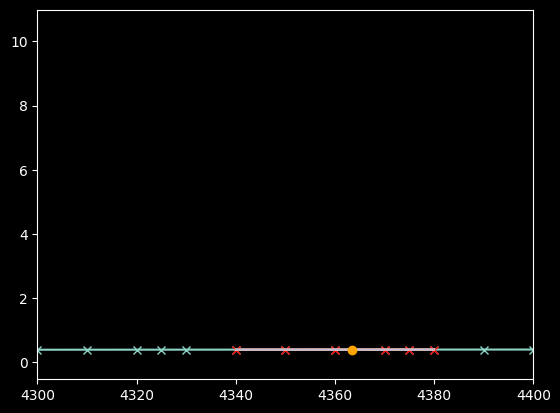

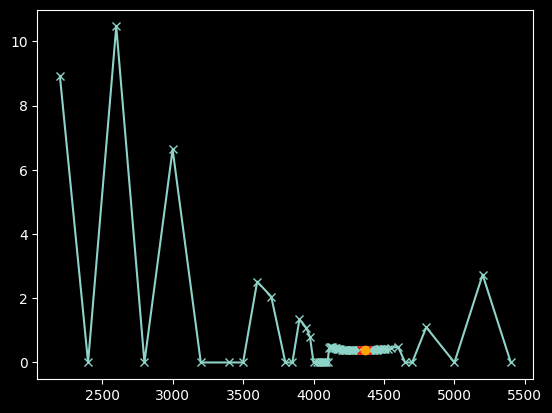

T: 2022-03-09


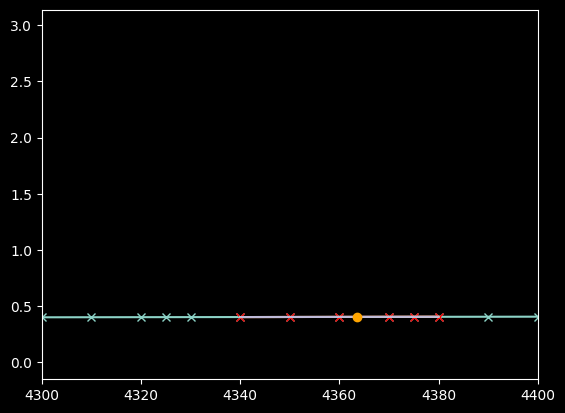

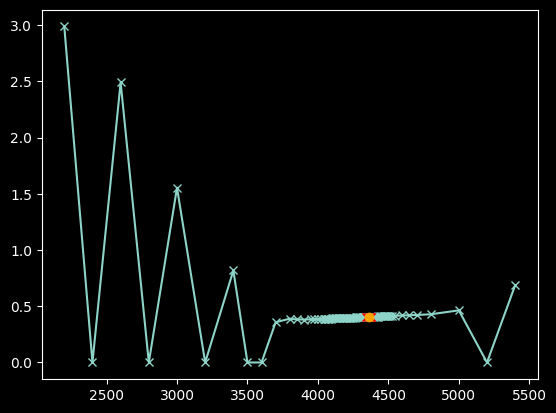

T: 2022-03-11


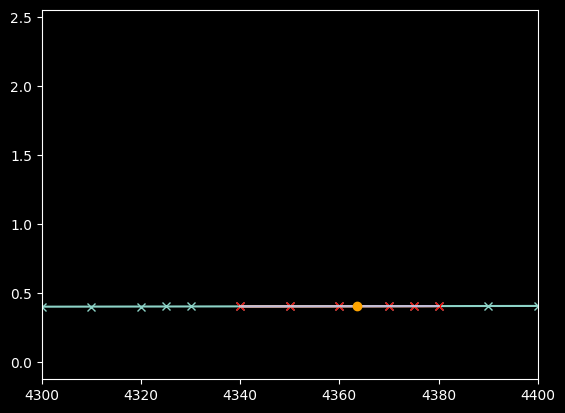

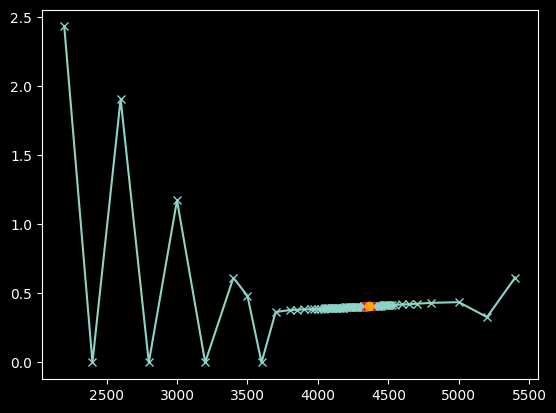

T: 2022-03-18


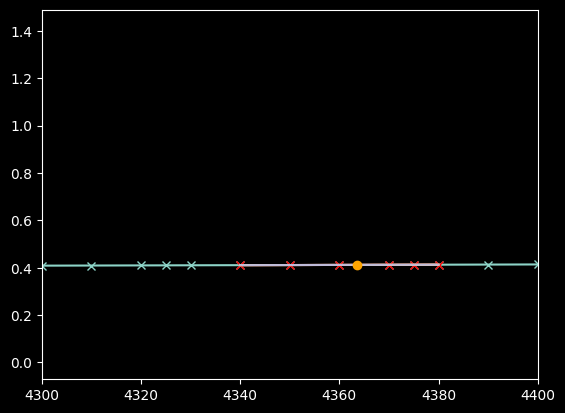

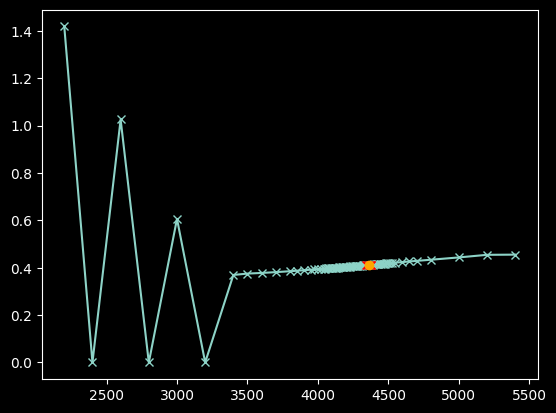

T: 2022-03-23


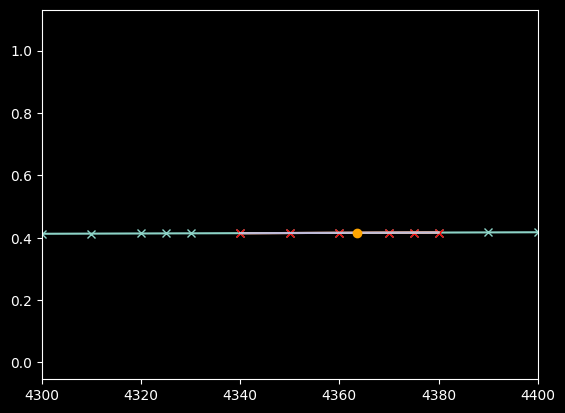

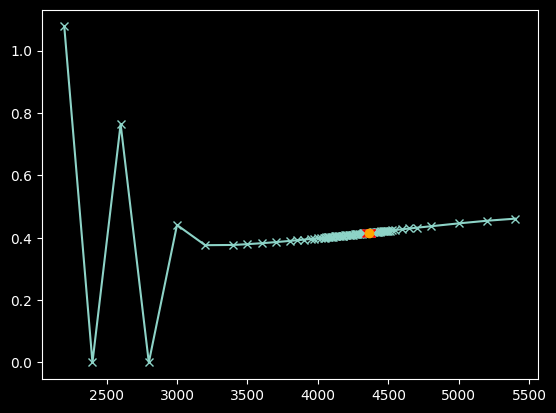

T: 2022-03-25


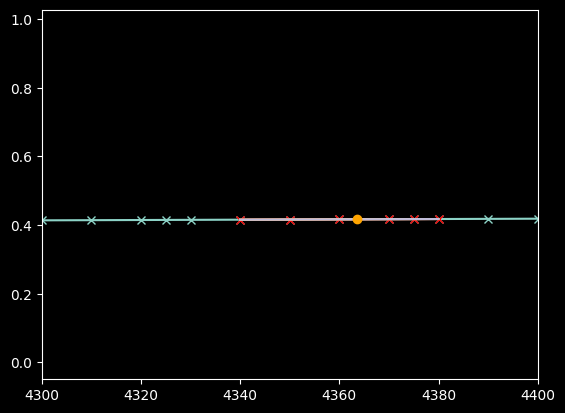

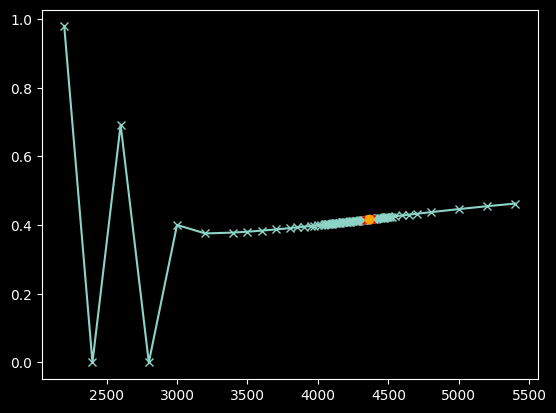

T: 2022-03-30


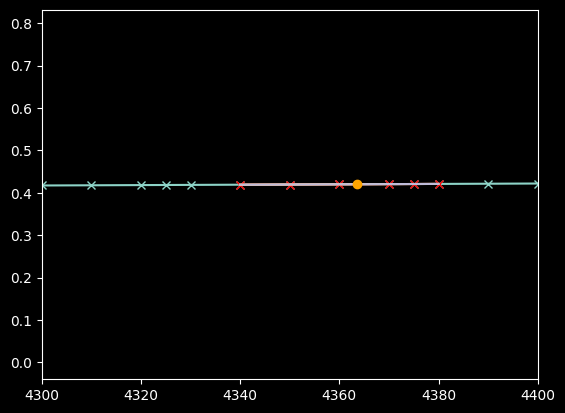

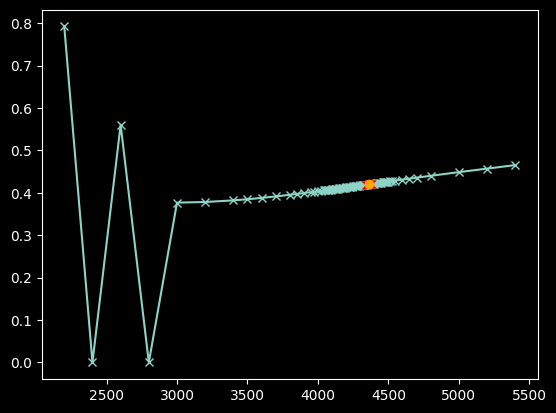

T: 2022-03-31


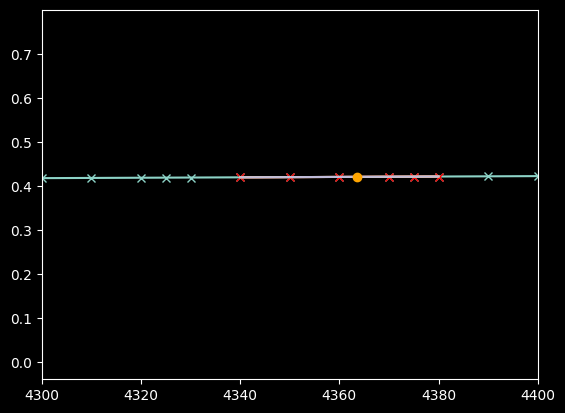

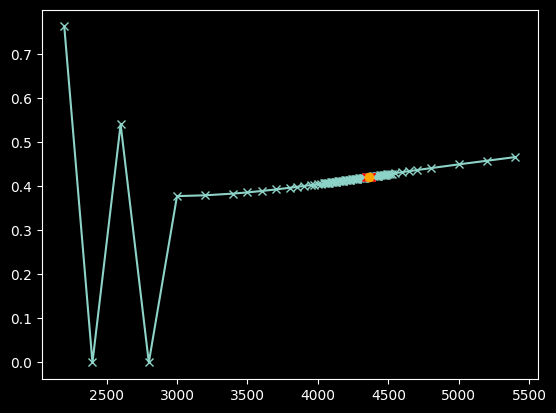

T: 2022-04-01


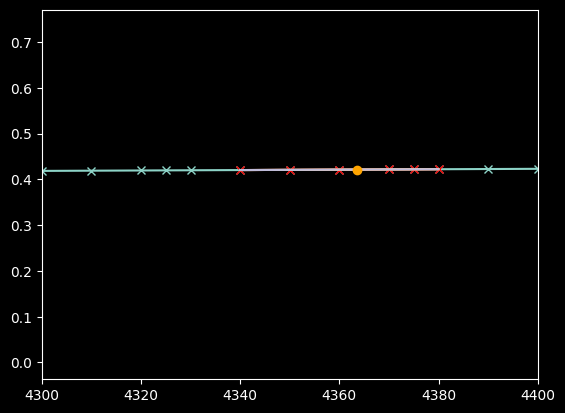

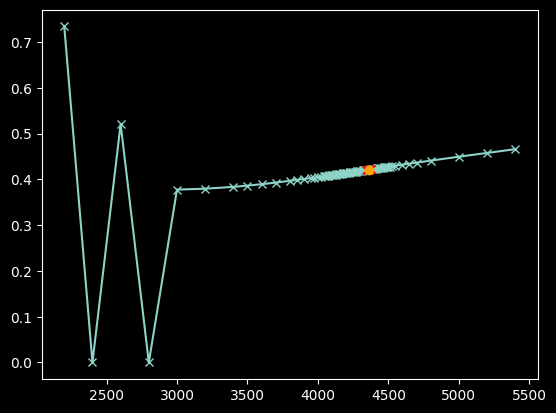

T: 2022-04-08


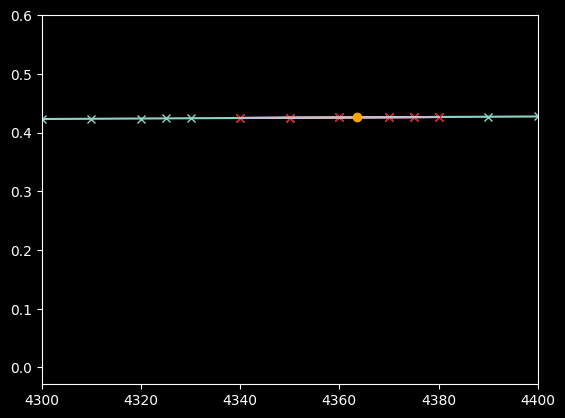

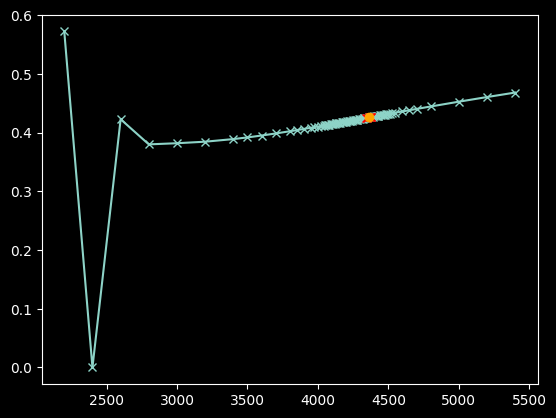

T: 2022-04-14


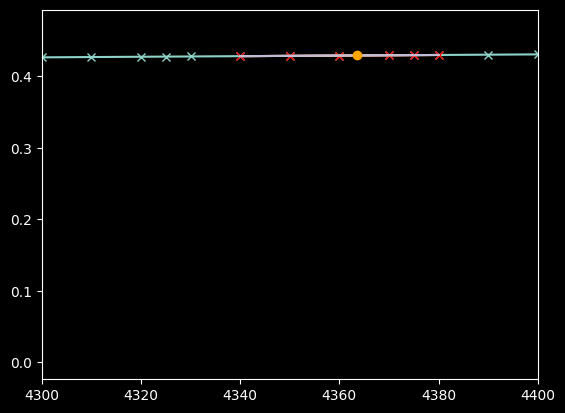

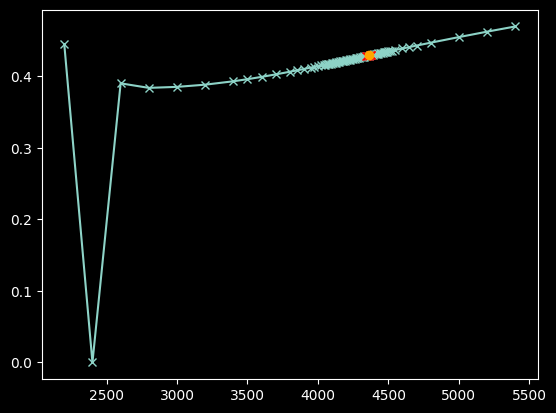

T: 2022-04-22


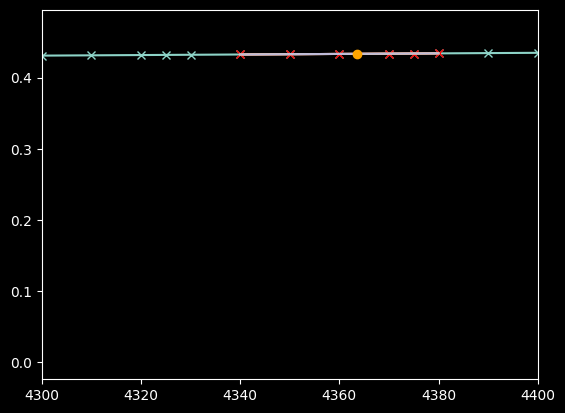

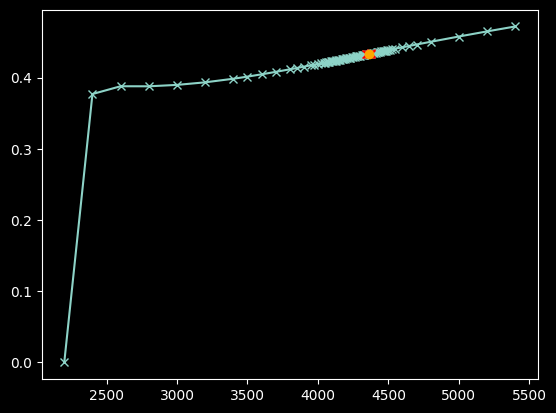

T: 2022-04-29


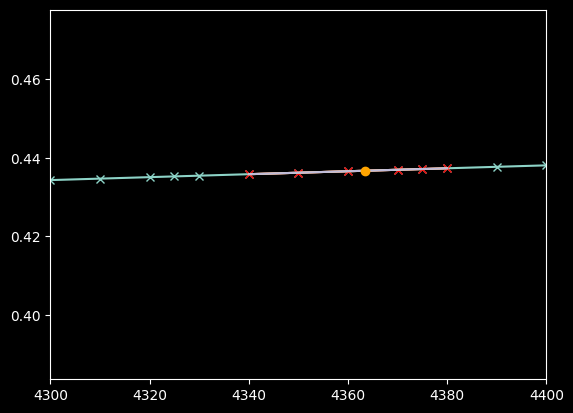

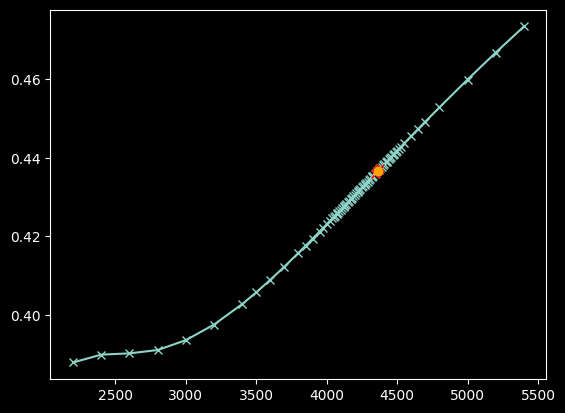

T: 2022-05-20


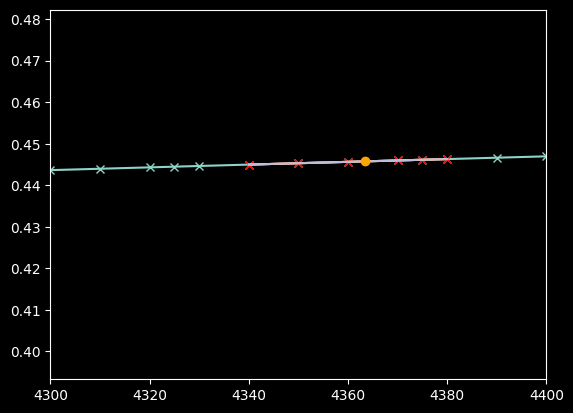

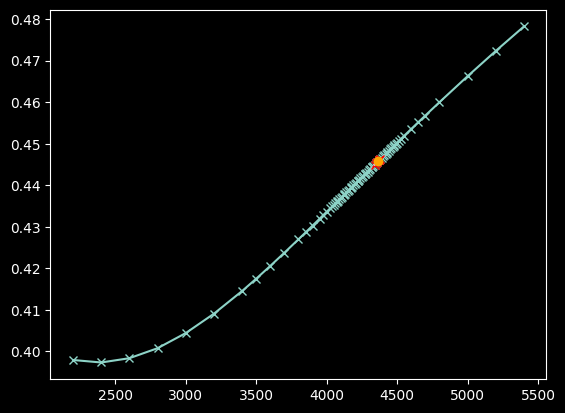

T: 2022-05-31


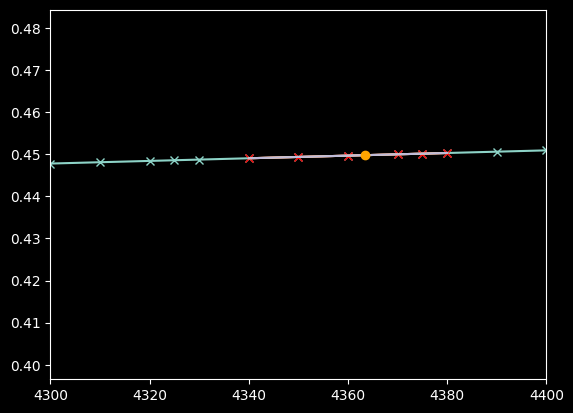

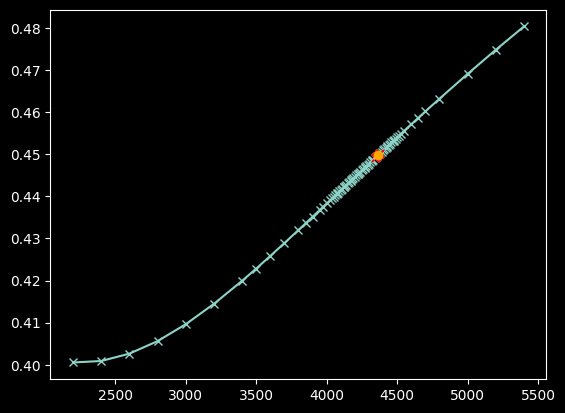

T: 2022-06-17


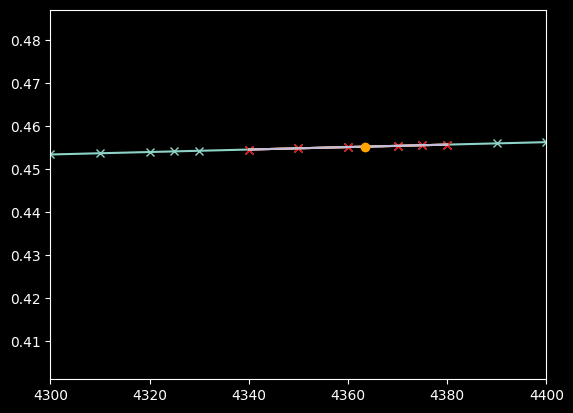

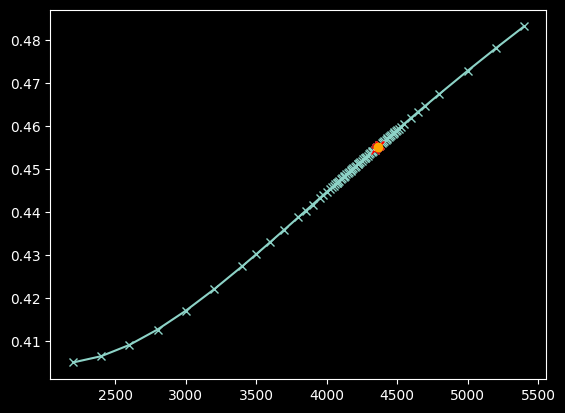

T: 2022-06-30


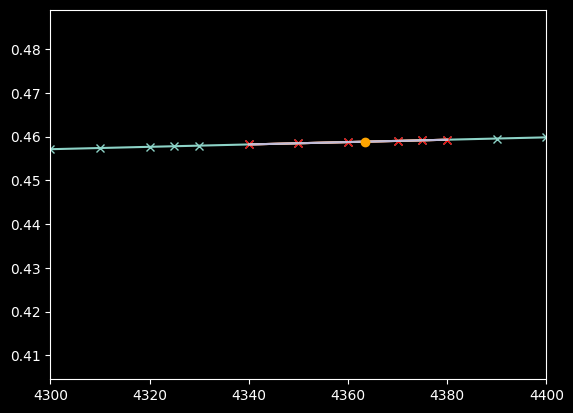

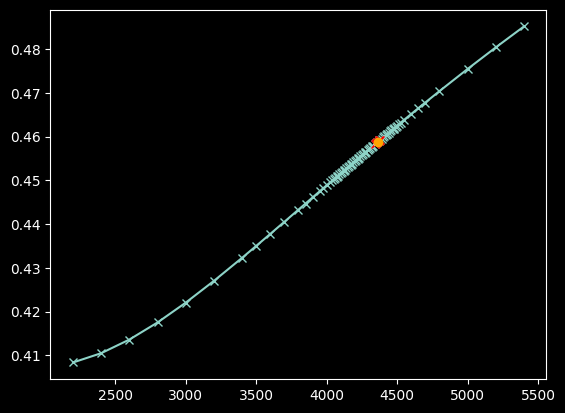

T: 2022-07-15


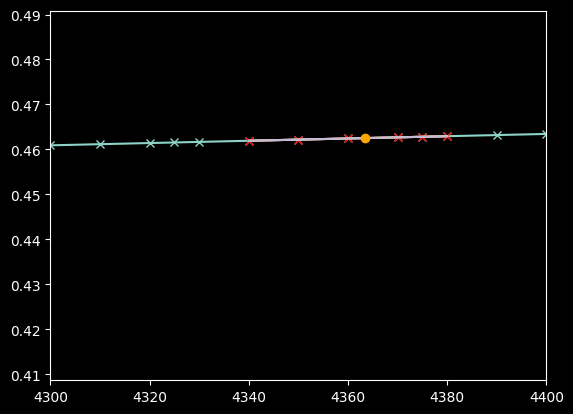

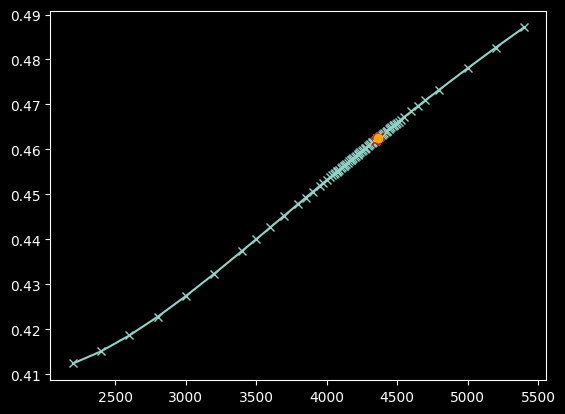

T: 2022-07-29


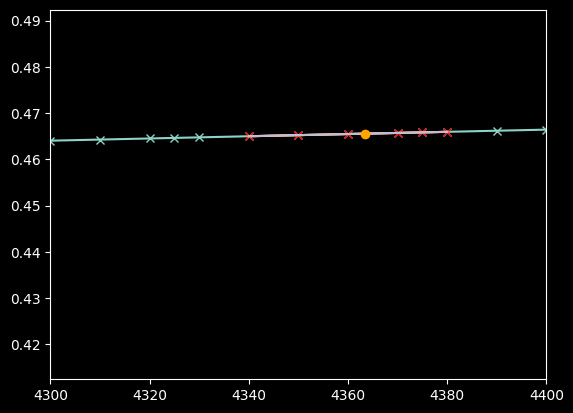

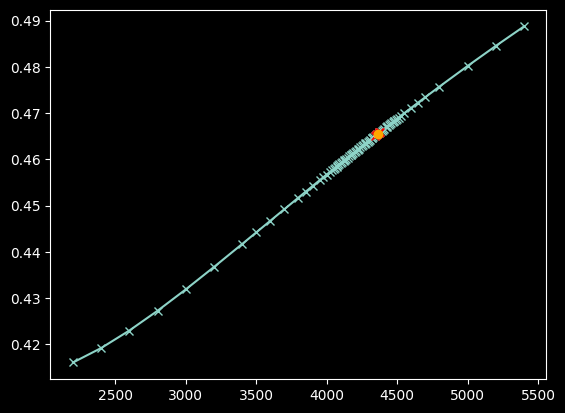

T: 2022-08-31


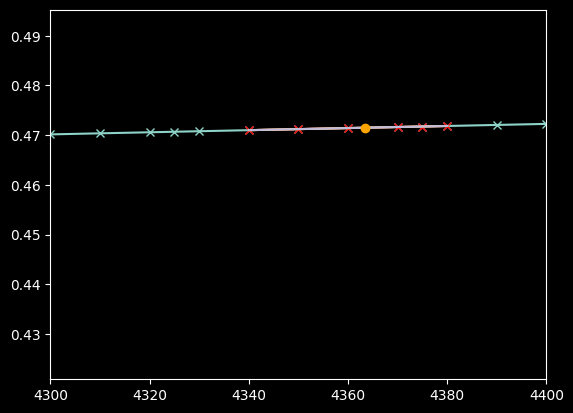

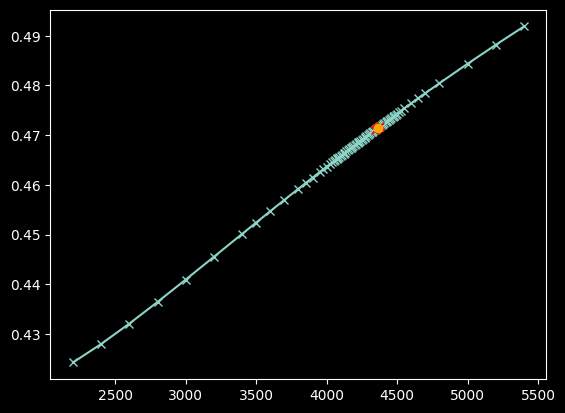

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline
from pandas import DataFrame
from typing import cast

from stochastic_volatility_models.src.core.underlying import Underlying
from stochastic_volatility_models.src.core.volatility_surface import VolatilitySurface
from stochastic_volatility_models.src.core.pricing_models import PricingModel
from stochastic_volatility_models.src.utils.options.strikes import find_closest_strikes
from stochastic_volatility_models.src.utils.options.expiry import time_to_expiry
from stochastic_volatility_models.visualisations.volatility_surface import plot_volatility_surface


volatility_surface = spx_vs
surface = volatility_surface.surface_quantities(
	time=time,
	quantity_method="model_pricing_implied_volatility",
	price_types=["Mid"],
	out_the_money=True,
	pricing_model=PricingModel(),
	model=model,
)[0]
for i, expiry in enumerate(volatility_surface.expiries):
	print(f"T: {expiry}")
	t2x = time_to_expiry(time, volatility_surface.expiries)
	indices = find_closest_strikes(
		strikes=volatility_surface.strikes,
		spot=volatility_surface.underlying.price(time=time),
	)
	# print(indices)
	cs = CubicSpline(
		x=indices,
		y=cast(DataFrame, surface.xs(key=expiry, level=1)).loc[indices, "Symbol"].values,
		bc_type="natural",
	)
	x = np.linspace(indices.min(), indices.max(), 100)
	s, i = np.polyfit(indices, cast(DataFrame, surface.xs(key=expiry, level=1)).loc[indices, "Symbol"].to_numpy(), 1)

	plt.plot(volatility_surface.strikes, cast(DataFrame, surface.xs(key=expiry, level=1)).loc[volatility_surface.strikes, "Symbol"].values, linestyle=None, marker="x")
	plt.plot(indices, cast(DataFrame, surface.xs(key=expiry, level=1)).loc[indices, "Symbol"].values, linestyle=None, marker="x", color="red")
	plt.plot(x, s * x + i)
	plt.plot(x, cs(x))
	plt.plot((spot := volatility_surface.underlying.price(time=time)), cs(spot), color="orange", marker="o")
	plt.gca().set_xlim(4300, 4400)
	# plt.gca().set_ylim(0.22, 0.34)
	plt.show()

	plt.plot(volatility_surface.strikes, cast(DataFrame, surface.xs(key=expiry, level=1)).loc[volatility_surface.strikes, "Symbol"].values, linestyle=None, marker="x")
	plt.plot(indices, cast(DataFrame, surface.xs(key=expiry, level=1)).loc[indices, "Symbol"].values, linestyle=None, marker="x", color="red")
	plt.plot(x, s * x + i)
	plt.plot(x, cs(x))
	plt.plot((spot := volatility_surface.underlying.price(time=time)), cs(spot), color="orange", marker="o")
	plt.show()

T: 2022-03-04


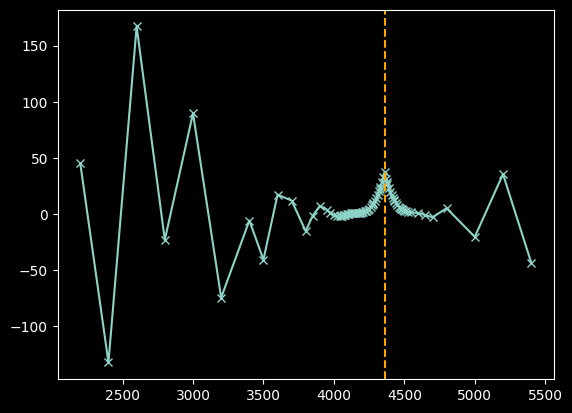

T: 2022-03-09


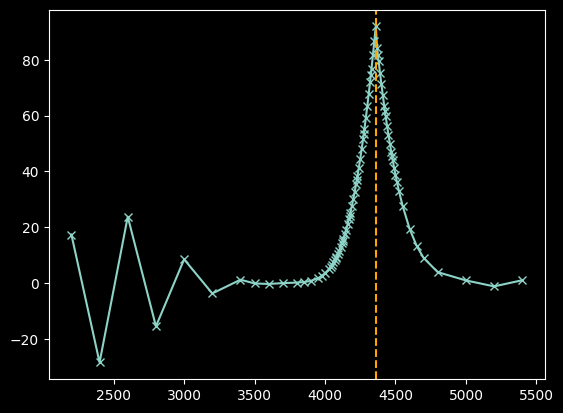

T: 2022-03-11


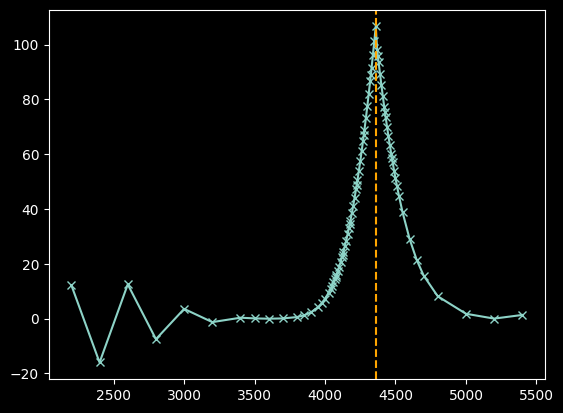

T: 2022-03-18


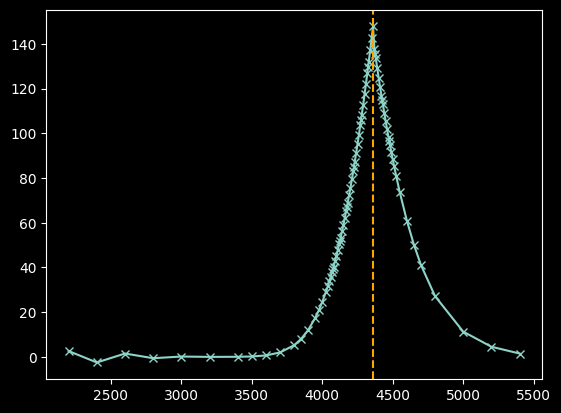

T: 2022-03-23


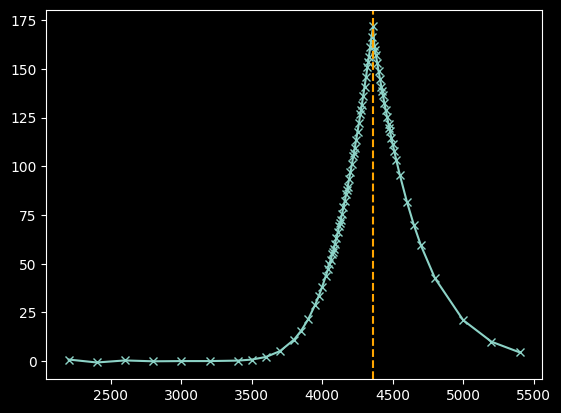

T: 2022-03-25


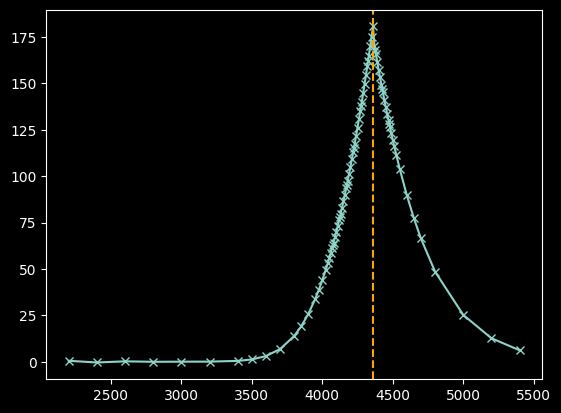

T: 2022-03-30


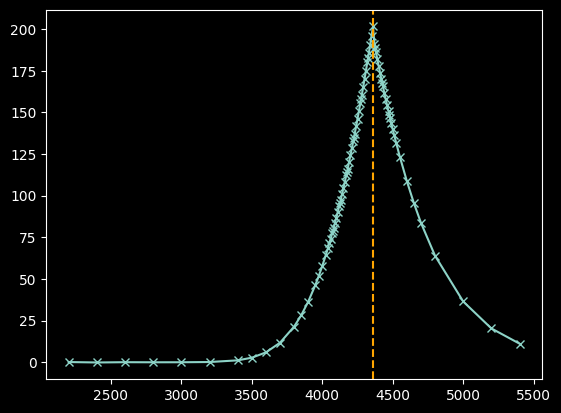

T: 2022-03-31


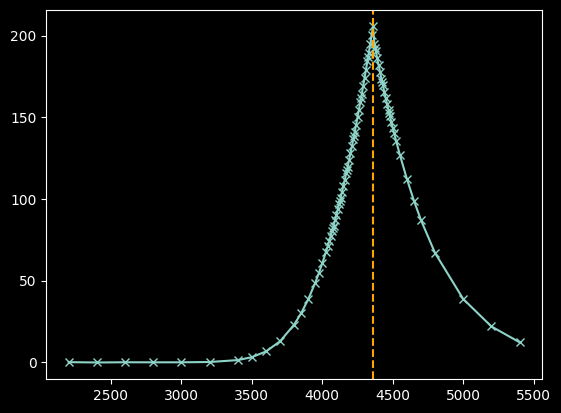

T: 2022-04-01


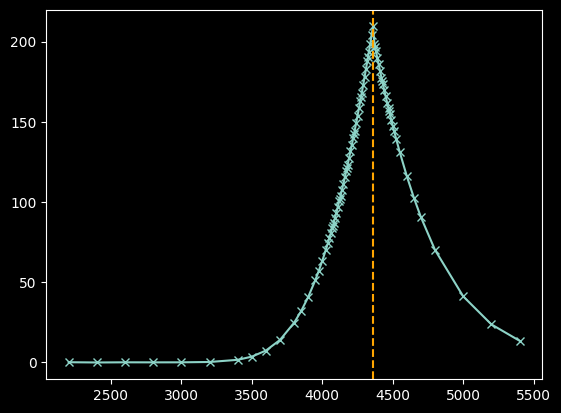

T: 2022-04-08


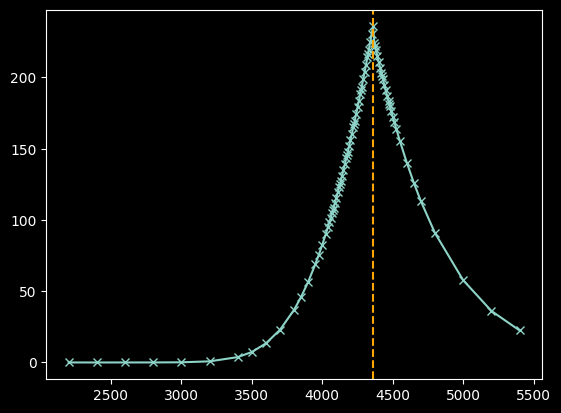

T: 2022-04-14


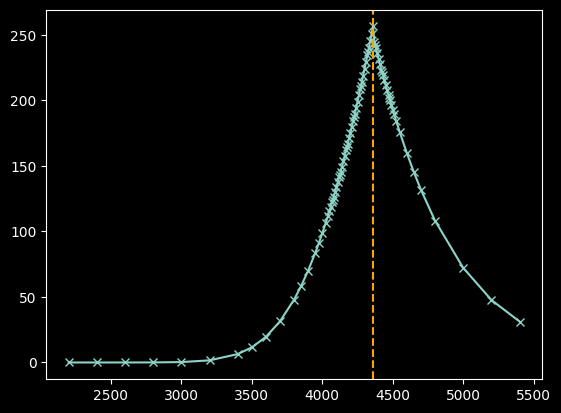

T: 2022-04-22


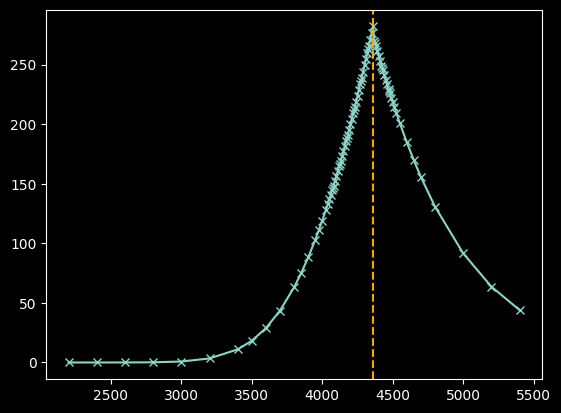

T: 2022-04-29


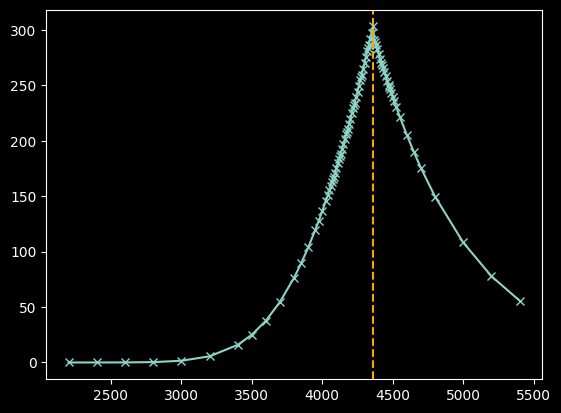

T: 2022-05-20


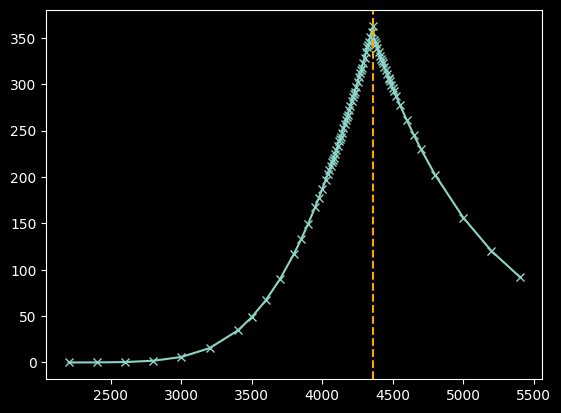

T: 2022-05-31


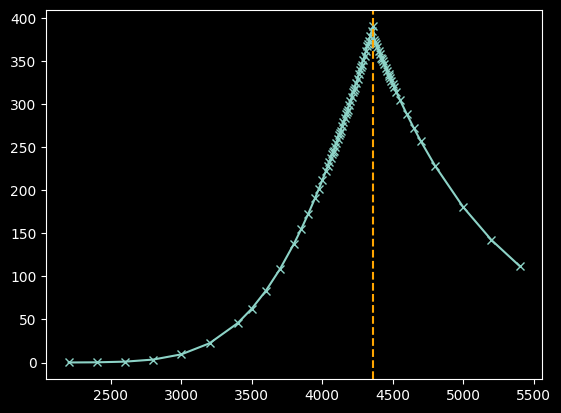

T: 2022-06-17


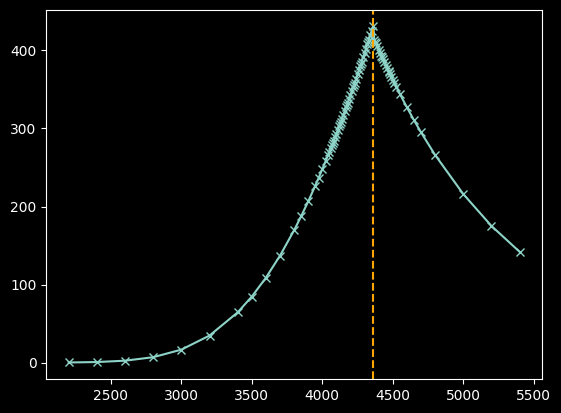

T: 2022-06-30


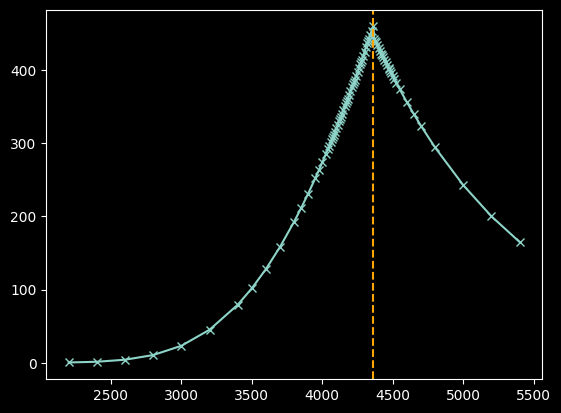

T: 2022-07-15


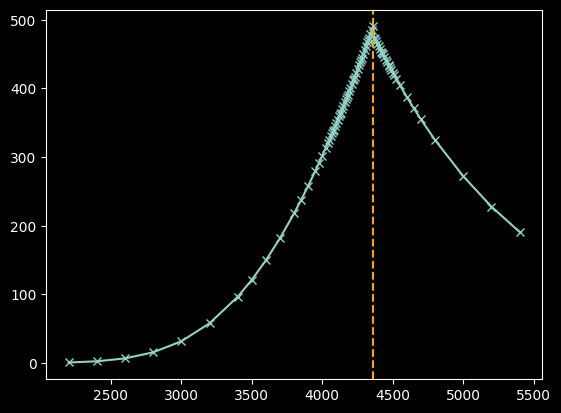

T: 2022-07-29


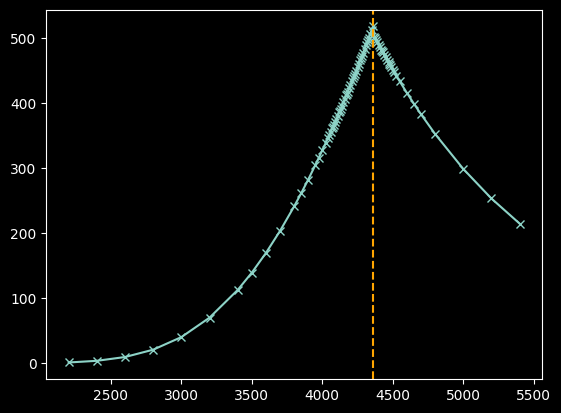

T: 2022-08-31


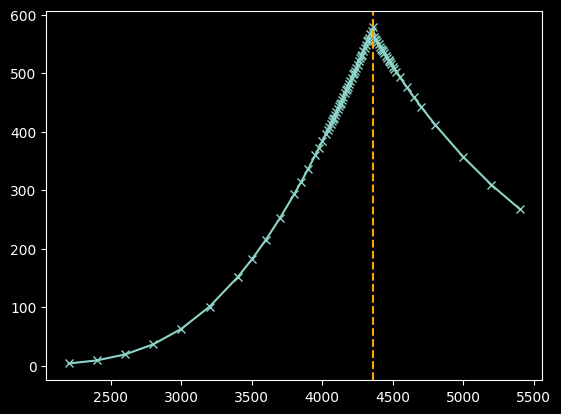

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline
from pandas import DataFrame
from typing import cast
import matplotlib.pyplot as plt

from stochastic_volatility_models.src.core.underlying import Underlying
from stochastic_volatility_models.src.core.volatility_surface import VolatilitySurface
from stochastic_volatility_models.src.core.pricing_models import PricingModel
from stochastic_volatility_models.src.utils.options.strikes import find_closest_strikes
from stochastic_volatility_models.src.utils.options.expiry import time_to_expiry
from stochastic_volatility_models.visualisations.volatility_surface import plot_volatility_surface


volatility_surface = spx_vs
surface = volatility_surface.surface_quantities(
	time=time,
	quantity_method="model_price",
	price_types=["Mid"],
	out_the_money=True,
	model=model,
)[0]
for i, expiry in enumerate(volatility_surface.expiries):
	print(f"T: {expiry}")
	t2x = time_to_expiry(time, volatility_surface.expiries)
	indices = find_closest_strikes(
		strikes=volatility_surface.strikes,
		spot=volatility_surface.underlying.price(time=time),
	)
	x = np.linspace(indices.min(), indices.max(), 100)
	plt.plot(volatility_surface.strikes, cast(DataFrame, surface.xs(key=expiry, level=1)).loc[volatility_surface.strikes, "Symbol"].values, linestyle=None, marker="x")
	plt.axvline(spot, color="orange", linestyle="dashed")
	plt.show()

In [13]:
parameters = model.fit(
	index_volatility_surface=spx_vs,
	volatility_index_volatility_surface=vix_vs,
	time=time,
	pricing_model=PricingModel(),
)
print(parameters)

2024-08-01 18:39:56.320 | DEBUG    | stochastic_volatility_models.src.core.calibration:minimise_cost_function:81 - Minimise cost function iteration with parameters {'initial_variance': 0.16, 'long_term_variance': 0.25, 'volatility_of_volatility': 0.8, 'mean_reversion_rate': 6.2, 'wiener_correlation': 0.5}
2024-08-01 18:40:25.339 | DEBUG    | stochastic_volatility_models.src.core.calibration:minimise_cost_function:81 - Minimise cost function iteration with parameters {'initial_variance': 0.1600000149011612, 'long_term_variance': 0.25, 'volatility_of_volatility': 0.8, 'mean_reversion_rate': 6.2, 'wiener_correlation': 0.5}
2024-08-01 18:40:38.874 | DEBUG    | stochastic_volatility_models.src.core.calibration:minimise_cost_function:81 - Minimise cost function iteration with parameters {'initial_variance': 0.16, 'long_term_variance': 0.2500000149011612, 'volatility_of_volatility': 0.8, 'mean_reversion_rate': 6.2, 'wiener_correlation': 0.5}
2024-08-01 18:40:50.837 | DEBUG    | stochastic_vol

KeyboardInterrupt: 